# Statistics Fundamentals

We'll cover:
- Intro:
    - Definition
    - Importance of Statistics for Data Science
    - Common Terms Used in Statistics
    - Statistics Types
- Types of Data
- Statistical Measures:
    - Univariate Analysis
        - Measures of Central Tendency
        - Measures of Dispersion
        - Measures of Shape
    - Multivariate Analysis
        - Covariance and Correlation

In [2]:
import pandas as pd
import numpy as np

## Intro
### What is Statistics?
- Another part of mathematics that involves the collection, analysis, interpretation, presentation, and organization of data.
- It's a discipline that deals with collection, description, analysis, and inference of conclusions from quantitative data (notes: there are techniques to perform stats on categorical data - e.g. chi square test)

### Importance of Statistics
- The first step in every DS project is to explore and interpret the data
- Statistics helps us extract impactful findings and define an object

### Common Terms Used in Statistics
- **Population and Sample:** 
    - Population is the complete pool from which the sample is drawn for further analysis. In other words, a sample is a subset of the population.
    - We cannot perform analysis on the full population. It's costly and time consuming. e.g. studying the rate of obesity in the US. It's nearly impossible to record data for every US Citizen (330 M people) Instead, we can use a subset from each state.
    - Therefore, it's essential to have a good sample at hand. The sample should be **good representative** of the population.
- **Measurement:** it's a number or attribute calculated or measured for each member of the sample.
- **Parameter** it's a characteristic of the population. e.g. population mean
- **Statistic** it's a characteristic of the sample. e.g. sample mean
- **Distribution** it refers to how the sample data is spread across a range of values 


In [3]:
data = {
    'name': ['Mark', 'Mike', 'Tammy', 'Becky', 'John'],
    'age': [55,43,27,35, 46],
    'score':[99,78,83,87, 79],
    'city': ['New York', 'Nashville', 'San Diego', 'Atlanta', 'Boston']
}

df = pd.DataFrame(data)
df

,name,age,score,city
0,Mark,55,99,New York
1,Mike,43,78,Nashville
2,Tammy,27,83,San Diego
3,Becky,35,87,Atlanta
4,John,46,79,Boston


- df is a sample from all the students of school (population)
- row 0, for example, is a record or a member of the sample

## Types of Statistics

![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ADSP_Images/Lesson_06_Maths_and_Stats/Statistics_Fundamentals/Image_1.png)

- **Descriptive Statistics:** it involves organizing, displaying, analyzing, and describing the data. e.g. avg  BMI, max strength, lowest score, correlation between A and B, etc... 
- **Inferential Statistics:** it involves building conclusions (inferences) about the population based on the sample. e.g. The increase of blood pressure is causing a heart attack
- **Predictive Statistics:** it involves extracting information from the data and using it predict trends, behavior, patterns, or relationships between attributes. 
    - e.g. Predicting the price of goods when inflation is high
    - e.g. Predicting the demand of spare parts can be determined by the number of cars sold

## Types of Data

- Categorical Data:  It represents characteristics, such as gender, blood type, country, marital status, car model, age group, etc...

- Numerical(Numeric) Data: It represents the data as a measurement, such as height, age, weight, blood pressure, sales

### Is date considered categorical or numerical?
- It depends on the context of the date element
- If we extract seconds from a date-timestamp -> numeric
- Date by default can be considered categorical if we're using it group the data by month, year, week, etc...
- It's a packaged data element where you can extract both numerical and categorical data

## Statistical Measures

### Measures of Central Tendency
- A measure of central tendency is a summary that describes the central position of the dataseet. 
- Keep in mind, if the data is skewed, those measures do not represent the exact center on the x-axis.
- They are also called the 3Ms: Mean, Median, and Mode

#### Mean
- The most popular statistical measure 
- mean = total of all data points divided by the count of the data points

In [4]:
# using pandas 
df['age'].mean(skipna=True) #use skip na to avoid counting for nulls

41.2

In [5]:
#using numpy
np.mean(df['age'])

41.2

In [6]:
#using statistics

import statistics as stat

stat.mean(df['age'])

41.2

> Using NumPy or Pandas is the recommended way for best performance.

#### Median

- The middle number obtained after arranging the data in ascending or descending order
- For an odd number of items in the list, it's straightforward to select the number in the middle
- For an even number of items in the list, you need to take the average of the 2 numbers in the middle. For example, for array `[4, 5, 6, 7, 8, 9, 10, 11]` we take the average of 7 and 8.

In [7]:
#using pandas
df['age'].median()

43.0

In [8]:
#using numpy
np.median(df['age'])

43.0

#### Mode
- It's the most frequent item on the list
- It's the only measure of central tendency that works with both categorical and numeric data

In [9]:
# using statistics
x = ['Red', 'Blue', 'Green', 'Red', 'Red', 'Blue']
stat.mode(x) 

'Red'

In [10]:
#using scipy with numpy
import scipy

scipy.stats.mode(x)

/var/folders/3x/ds4ljhhn611fn_glg6pp102h0000gq/T/ipykernel_16020/1283058046.py:4: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  scipy.stats.mode(x)
/var/folders/3x/ds4ljhhn611fn_glg6pp102h0000gq/T/ipykernel_16020/1283058046.py:4: DeprecationWarning: Support for non-numeric arrays has been deprecated as of SciPy 1.9.0 and will be removed in 1.11.0. `pandas.DataFrame.mode` can be used instead, see https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mode.html.
  scipy.stats.mode(x)


ModeResult(mode=array(['Red'], dtype='<U5'), count=array([3]))

Numerical data:

In [13]:
# mode using pandas is recommended - it will be deprecated in scipy
x = pd.Series([ 2,3,4,3,2,6,2])

x.mode()

0    2
dtype: int64

In [15]:
x = pd.Series([ 2,3,4,3,2,6,2,3])
x.mode()

0    2
1    3
dtype: int64

In [16]:
# if all numbers have the same occurence, mode shows all
df['age'].mode()

0    27
1    35
2    43
3    46
4    55
Name: age, dtype: int64

### Measures of Dispersion

- The mean may pose problems in terms of describing the data. It could be unrliable on its own for 2 reasons:
    1. It's sensitive to ourliers
    2. It may not be enough to describe the difference and full characteristics of datasets
- Measure of Dispersion can help explain the differences between datasets if they share the same mean
- It is also known as the measures of variability because they're used to understand the extend of spread or diversity

In [18]:
# Dataset 1
data1 = np.array([3,5,6,7,8])

# Dataset 2
data2 = np.array([2,5,5,8,9])

# Dataset 3
data3 = np.array([2,4,4,9,10])

In [20]:
print('Data 1 mean:',np.mean(data1))
print('Data 2 mean:',np.mean(data2))
print('Data 3 mean:',np.mean(data3))

Data 1 mean: 5.8
Data 2 mean: 5.8
Data 3 mean: 5.8


**Observation** 
- Despite the fact all 3 datasets don't look the same, they have the same average. 
- The average/mean is not giving the full picture.
- Therefore, we need another measure that explains that all 3 datasets are different

In [21]:
print('Data 1 mean:',np.std(data1))
print('Data 2 mean:',np.std(data2))
print('Data 3 mean:',np.std(data3))

Data 1 mean: 1.7204650534085253
Data 2 mean: 2.4819347291981715
Data 3 mean: 3.1240998703626617


#### Standard Deviation
![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ADSP_Images/Lesson_05_Data_Visualization/standard_deviation.png)



- explains the dispersion of the data and shows that all 3 datasets above are different
- It's the most popular measure of dispersion
- It measures the spread of data around the mean
- It's defined as the sum of squares of the deviation around the mean divided by the number of observations


#### Variance
- It's the expected value of the squared deviation from the mean
- In other words, it's the squared value of the Standard Deviation

#### Range
- It's the difference between the largest and smallest data points in the dataset.
- It's sensitive to outliers

In [23]:
df['age'].max() - df['age'].min()

28

In [25]:
#method 2
x = [ 2,3,4,3,2,6,2,3]

np.max(x) - np.min(x)

4

#### Percentile

In [33]:
x = np.arange(1,101)
x

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100])

<Axes: >

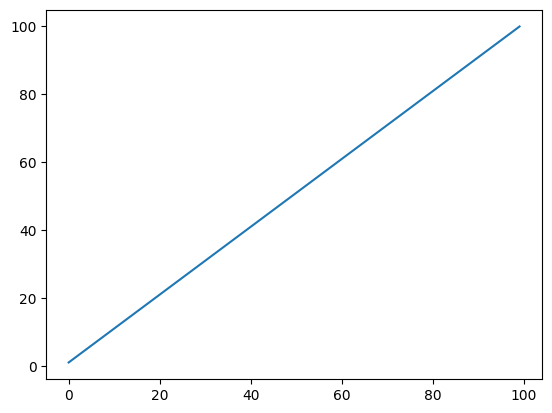

In [32]:
pd.Series(x).plot()

In [34]:
x = np.array([1,2,3,6,8,9,12,23,10,11,5,3,17,14])
percentile_30th = np.percentile(x, 30)
percentile_30th

4.8

In [35]:
len(x)

14

- 4.8 is the threshold where 70% of my data exists on the right side and 30% of my data exists on the left side
- all data points above 4.8 are considered in the top 70 by value
- all data points below 4.8 are considered in the bottom 30 by value

In [48]:
arr = np.random.uniform(1,300, 1000)
arr

array([261.81164894,  89.14355899,   2.00632453,  17.24330599,
       127.71935934,   8.05246935,  99.31860987, 283.81039242,
       168.23109463,  74.97064234, 223.49299408, 258.27341534,
       263.30608047, 298.4874089 , 101.2559078 , 265.79473063,
        87.78416547, 224.80610165,  99.2487343 ,  55.86804772,
       252.94516754,  17.34692119,  12.97857515,   6.03174802,
       170.61942757, 106.45632326,  10.51173035, 117.78580521,
       118.421084  , 223.76839166, 270.10110575, 299.06718002,
       231.11299705, 217.90726089, 169.09385082, 239.36382447,
        78.97359453, 242.60197337,  16.84720952,  51.13015389,
        27.41614295, 245.29019234, 128.86417868, 111.16702536,
       159.58612129,  64.13344325,  91.32721081,   7.24714321,
       201.81821145, 195.71190067, 146.70346438, 140.61003022,
        97.79650756, 149.84509376, 254.53026153, 138.44818406,
       104.73462874, 114.52345528,  37.66754883, 176.53621884,
       249.03278489, 206.7853389 , 111.97288046,  86.28

In [51]:
arr.max()

299.8534308004818

<Axes: >

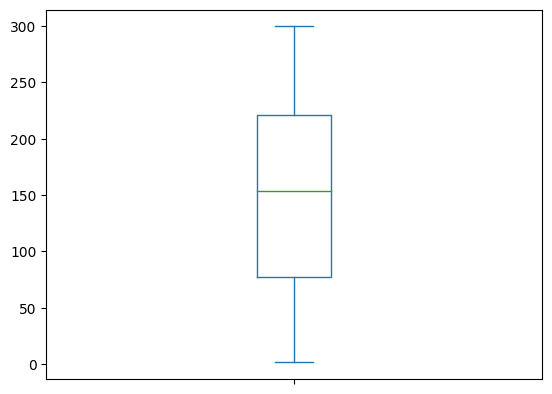

In [49]:
pd.Series(arr).plot.box()

In [50]:
pd.Series(arr).describe()

count    1000.000000
mean      148.883806
std        85.032274
min         1.579906
25%        77.287820
50%       154.030742
75%       221.033793
max       299.853431
dtype: float64

- 50% of my population is below 154. This point is also called the **median**.
- a quarter of my population is below 77 (25th percentile).
- 3 quarters of my population is below 221 (75th percentile).
- 299.85 is the max - also called the 100th percentile.
- 25, 50, and 75 are also called **quartiles** because they divide the data into 4 quarters.

#### Interquartile Range

![link text](https://blogmedia.testbook.com/blog/wp-content/uploads/2022/07/interquartile-range_1-8412ebed.png)

- The interquartile range is the distance between Q1 and Q3 (25th and 75th percentiles)
- It describes the middle 50% of the observations
- It is used to derive formulas for upper and lower ranges for outlier treatment

### Measures of Shape

#### Skewness

![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ADSP_Images/Lesson_05_Data_Visualization/skew.png)

In [52]:
a = [5,7,10,12]
np.mean(a)

8.5

In [54]:
b = [5,7,10,50]
np.mean(b)

18.0

- in array a, the average is giving a good representation of the center of the data
- array b, on the other hand, has extreme values and the average is not a good representation of the center of the data
- b is skewed because of it's extreme value or long tail

In [56]:
from scipy.stats import skew
skew(b)

1.1232115519647907

B is positively skewed because the number is higher than 0

![meanmedianmode.png](https://s3.us-east-1.amazonaws.com/static2.simplilearn.com/lms/testpaper_images/ADSP/Advanced_Statistics/Probimages/Statistics_Fundamentals/Statistics_Notebookupdated/meanmedianmode.png)

- Positive Skew (Right Skew): if the skewness value > 0 (positive), the distribution tail is stretched more to the **right** side of the x-axis
- Negative Skew (Left Skew): if the skewness value <> 0 (negative), the distribution tail is stretched more to the **left** side of the x-axis
- Zero Skewness: the value is or very close to zero. The distribution is fairly symmetric.


In [59]:
#example of negative skew

c = [0.04,7,12,11]
skew(c)

-0.6832289141093296

#### Kurtosis
![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ADSP_Images/Lesson_05_Data_Visualization/kurtosis.png)

- Data with high kurtosis tend to have heavy tails or outliers
- If Kurtosis is low, there will be minimum outliers
- A minimum kurotsis shows that the data is normally distributed

![positivenegativekurt.PNG](https://s3.us-east-1.amazonaws.com/static2.simplilearn.com/lms/testpaper_images/ADSP/Advanced_Statistics/Probimages/Statistics_Fundamentals/Statistics_Notebookupdated/positivenegativekurt.PNG)

#### Covariance and Correlation
- Previous measures fall under the category of **Univariate** Analysis as it deals with a single variable/array/column/series.
- Covariance and Correlation, on the other hand, deal with **Multivariate** Analysis (Relationship between 2 or more variables)
- They measure the relationship and dependency between two variables.
- numerical variables only

#### Covariance

![covsample.PNG](https://s3.us-east-1.amazonaws.com/static2.simplilearn.com/lms/testpaper_images/ADSP/Advanced_Statistics/Probimages/Statistics_Fundamentals/Statistics_Notebookupdated/covsample.PNG)
- It gives the direction of the relationship
- The direction value can be interpreted as:
    - Negative means if x goes up, y goes down (and vice-versa)
    - Positive means if x goes up, y goes up (and vice-versa)

#### Correlation
![corelation.PNG](https://s3.us-east-1.amazonaws.com/static2.simplilearn.com/lms/testpaper_images/ADSP/Advanced_Statistics/Probimages/Statistics_Fundamentals/Statistics_Notebookupdated/corelation.PNG)
- Correlation is the most common measure of the two and most useful
- Also called the Pearson correlation
- It provides both relationship direction and magnitude (correlation coefficient)
- Correlation Coefficient Value Interpretation: It ranges between -1 and 1
    - 0 or close to 0 means no or very low correlation
    - close to -1 means the two variables are highly negatively correlated
    - close to 1 means the two variables are highly positively correlated

In [62]:
data = {
            'income':[10000, 20000, 15000, 25000],
            'age': [25, 34, 27, 37],
            'health_score': [95, 60, 90, 57],
            'movies_watched': [7,4,4,9] 
}

df = pd.DataFrame(data)
df

,income,age,health_score,movies_watched
0,10000,25,95,7
1,20000,34,60,4
2,15000,27,90,4
3,25000,37,57,9


In [63]:
df.corr()

,income,age,health_score,movies_watched
income,1.000000,0.977525,-0.940153,0.316228
age,0.977525,1.000000,-0.987000,0.335480
health_score,-0.940153,-0.987000,1.000000,-0.233988
movies_watched,0.316228,0.335480,-0.233988,1.000000


- Column `movies_watched` has no relationship with other column (low positive correlation with other columns)
- Columns `income` and `age` have **high positive correlation**. If `age` goes up, `income` does too.
- Columns `age` and `health_score` have **high negative correlation**. If `age` goes up, `health_score` goes down

> Commonly, you want to find variables with absolute score higher than 60% or 0.6 (in both negative or positive directions) to say they are highly correlated